In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
Querterly_earnings_path="META_quarterly_financials.csv"
Historical_prices_path = "META.csv"

# Read the mouse data and the study results
Querterly_earnings = pd.read_csv(Querterly_earnings_path)
META = pd.read_csv(Historical_prices_path)



In [30]:
META.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-06-01,28.889999,33.450001,25.520000,31.100000,31.100000,6.679105e+08
1,2012-07-01,31.250000,32.880001,21.610001,21.709999,21.709999,5.201897e+08
2,2012-08-01,21.500000,22.450001,18.030001,18.059999,18.059999,1.151945e+09
3,2012-09-01,18.080000,23.370001,17.549999,21.660000,21.660000,1.058644e+09
4,2012-10-01,22.080000,24.250000,18.799999,21.110001,21.110001,1.100938e+09


In [15]:
Querterly_earnings.head()

,name,ttm,09/30/2023,06/30/2023,03/31/2023,12/31/2022,09/30/2022,06/30/2022,03/31/2022,12/31/2021,...,06/30/2013,03/31/2013,12/31/2012,09/30/2012,06/30/2012,03/31/2012,12/31/2011,09/30/2011,06/30/2011,03/31/2011
0,TotalRevenue,"126,956,000,000","34,146,000,000","31,999,000,000","28,645,000,000","32,165,000,000","27,714,000,000","28,822,000,000","27,908,000,000","33,671,000,000",...,"1,813,000,000","1,458,000,000","1,585,000,000","1,262,000,000","1,184,000,000","1,058,000,000","1,131,000,000","954,000,000","895,000,000","731,000,000"
1,\tOperatingRevenue,"126,048,000,000","33,853,000,000","31,774,000,000","28,440,000,000","31,981,000,000","27,522,000,000","28,604,000,000","27,693,000,000","33,516,000,000",...,"1,813,000,000","1,458,000,000","1,585,000,000","1,262,000,000","1,184,000,000","1,058,000,000","1,131,000,000","954,000,000","895,000,000","731,000,000"
2,CostOfRevenue,"26,600,000,000","6,210,000,000","5,945,000,000","6,108,000,000","8,336,000,000","5,716,000,000","5,192,000,000","6,005,000,000","6,348,000,000",...,"465,000,000","413,000,000","398,000,000","322,000,000","367,000,000","277,000,000","247,000,000","236,000,000","210,000,000","167,000,000"
3,GrossProfit,"100,356,000,000","27,936,000,000","26,054,000,000","22,537,000,000","23,829,000,000","21,998,000,000","23,630,000,000","21,903,000,000","27,323,000,000",...,"1,348,000,000","1,045,000,000","1,187,000,000","940,000,000","817,000,000","781,000,000","884,000,000","718,000,000","685,000,000","564,000,000"
4,OperatingExpense,"63,590,000,000","14,188,000,000","16,662,000,000","15,310,000,000","17,430,000,000","16,334,000,000","15,272,000,000","13,379,000,000","14,738,000,000",...,"786,000,000","672,000,000","664,000,000","563,000,000","1,560,000,000","400,000,000","337,000,000","304,000,000","278,000,000","176,000,000"


In [37]:
#Calculate monthly  rate of return in series
META_close = META['Close']
META_return = np.log(META_close).diff()
META_return.head()




0         NaN
1   -0.359435
2   -0.184073
3    0.181768
4   -0.025720
Name: Close, dtype: float64

<Axes: >

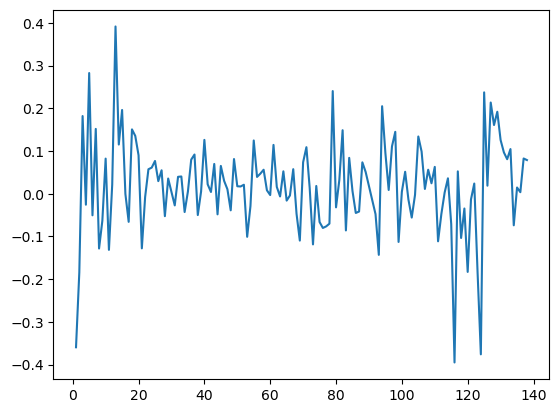

In [36]:
#plot the rate of return series
META_return.plot()

In [39]:
#statistical description
META_return.describe()

count    138.000000
mean       0.017623
std        0.110687
min       -0.395033
25%       -0.042584
50%        0.017591
75%        0.079556
max        0.391434
Name: Close, dtype: float64

In [40]:
Querterly_earnings.transpose().head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
name,TotalRevenue,\tOperatingRevenue,CostOfRevenue,GrossProfit,OperatingExpense,\tSellingGeneralAndAdministration,\t\tGeneralAndAdministrativeExpense,\t\t\tOtherGandA,\t\tSellingAndMarketingExpense,\tResearchAndDevelopment,...,EBIT,EBITDA,ReconciledCostOfRevenue,ReconciledDepreciation,NetIncomeFromContinuingOperationNetMinorityInt...,TotalUnusualItemsExcludingGoodwill,TotalUnusualItems,NormalizedEBITDA,TaxRateForCalcs,TaxEffectOfUnusualItems
ttm,"126,956,000,000","126,048,000,000","26,600,000,000","100,356,000,000","63,590,000,000","25,853,000,000","12,204,000,000","12,204,000,000","13,649,000,000","37,737,000,000",...,"37,130,000,000","47,512,000,000","26,600,000,000","10,382,000,000","29,734,000,000","-248,000,000","-248,000,000","47,760,000,000",0.191,"-47,455,208.05"
09/30/2023,"34,146,000,000","33,853,000,000","6,210,000,000","27,936,000,000","14,188,000,000","4,947,000,000","2,070,000,000","2,070,000,000","2,877,000,000","9,241,000,000",...,"14,159,000,000","17,018,000,000","6,210,000,000","2,859,000,000","11,583,000,000","-98,000,000","-98,000,000","17,116,000,000",0.17,"-16,660,000"
06/30/2023,"31,999,000,000","31,774,000,000","5,945,000,000","26,054,000,000","16,662,000,000","7,318,000,000","4,164,000,000","4,164,000,000","3,154,000,000","9,344,000,000",...,"9,392,000,000","12,015,000,000","5,945,000,000","2,623,000,000","7,788,000,000","-145,000,000","-145,000,000","12,015,000,000",0.16,0
03/31/2023,"28,645,000,000","28,440,000,000","6,108,000,000","22,537,000,000","15,310,000,000","5,929,000,000","2,885,000,000","2,885,000,000","3,044,000,000","9,381,000,000",...,"7,227,000,000","9,751,000,000","6,108,000,000","2,524,000,000","5,709,000,000","-63,000,000","-63,000,000","9,751,000,000",0.22,0


In [48]:
#Doing transpose without index
Earnings = Querterly_earnings.set_index('name').transpose()
Earnings

name,TotalRevenue,\tOperatingRevenue,CostOfRevenue,GrossProfit,OperatingExpense,\tSellingGeneralAndAdministration,\t\tGeneralAndAdministrativeExpense,\t\t\tOtherGandA,\t\tSellingAndMarketingExpense,\tResearchAndDevelopment,...,EBIT,EBITDA,ReconciledCostOfRevenue,ReconciledDepreciation,NetIncomeFromContinuingOperationNetMinorityInterest,TotalUnusualItemsExcludingGoodwill,TotalUnusualItems,NormalizedEBITDA,TaxRateForCalcs,TaxEffectOfUnusualItems
ttm,"126,956,000,000","126,048,000,000","26,600,000,000","100,356,000,000","63,590,000,000","25,853,000,000","12,204,000,000","12,204,000,000","13,649,000,000","37,737,000,000",...,"37,130,000,000","47,512,000,000","26,600,000,000","10,382,000,000","29,734,000,000","-248,000,000","-248,000,000","47,760,000,000",0.191,"-47,455,208.05"
09/30/2023,"34,146,000,000","33,853,000,000","6,210,000,000","27,936,000,000","14,188,000,000","4,947,000,000","2,070,000,000","2,070,000,000","2,877,000,000","9,241,000,000",...,"14,159,000,000","17,018,000,000","6,210,000,000","2,859,000,000","11,583,000,000","-98,000,000","-98,000,000","17,116,000,000",0.17,"-16,660,000"
06/30/2023,"31,999,000,000","31,774,000,000","5,945,000,000","26,054,000,000","16,662,000,000","7,318,000,000","4,164,000,000","4,164,000,000","3,154,000,000","9,344,000,000",...,"9,392,000,000","12,015,000,000","5,945,000,000","2,623,000,000","7,788,000,000","-145,000,000","-145,000,000","12,015,000,000",0.16,0
03/31/2023,"28,645,000,000","28,440,000,000","6,108,000,000","22,537,000,000","15,310,000,000","5,929,000,000","2,885,000,000","2,885,000,000","3,044,000,000","9,381,000,000",...,"7,227,000,000","9,751,000,000","6,108,000,000","2,524,000,000","5,709,000,000","-63,000,000","-63,000,000","9,751,000,000",0.22,0
12/31/2022,"32,165,000,000","31,981,000,000","8,336,000,000","23,829,000,000","17,430,000,000","7,659,000,000","3,085,000,000","3,085,000,000","4,574,000,000","9,771,000,000",...,"6,399,000,000","8,775,000,000","8,336,000,000","2,376,000,000","4,652,000,000","57,000,000","57,000,000","8,775,000,000",0.24,0
09/30/2022,"27,714,000,000","27,522,000,000","5,716,000,000","21,998,000,000","16,334,000,000","7,164,000,000","3,384,000,000","3,384,000,000","3,780,000,000","9,170,000,000",...,"5,664,000,000","7,839,000,000","5,716,000,000","2,175,000,000","4,395,000,000","-131,000,000","-131,000,000","7,839,000,000",0.21,0
06/30/2022,"28,822,000,000","28,604,000,000","5,192,000,000","23,630,000,000","15,272,000,000","6,582,000,000","2,987,000,000","2,987,000,000","3,595,000,000","8,690,000,000",...,"8,358,000,000","10,337,000,000","5,192,000,000","1,979,000,000","6,687,000,000","-60,000,000","-60,000,000","10,337,000,000",0.18,0
03/31/2022,"27,908,000,000","27,693,000,000","6,005,000,000","21,903,000,000","13,379,000,000","5,672,000,000","2,360,000,000","2,360,000,000","3,312,000,000","7,707,000,000",...,"8,524,000,000","10,680,000,000","6,005,000,000","2,156,000,000","7,465,000,000","54,000,000","54,000,000","10,680,000,000",0.16,0
12/31/2021,"33,671,000,000","33,516,000,000","6,348,000,000","27,323,000,000","14,738,000,000","7,692,000,000","3,305,000,000","3,305,000,000","4,387,000,000","7,046,000,000",...,"12,585,000,000","14,599,000,000","6,348,000,000","2,014,000,000","10,285,000,000","1,000,000","1,000,000","14,599,000,000",0.19,0
09/30/2021,"29,010,000,000","28,276,000,000","5,771,000,000","23,239,000,000","12,816,000,000","6,500,000,000","2,946,000,000","2,946,000,000","3,554,000,000","6,316,000,000",...,"10,423,000,000","12,418,000,000","5,771,000,000","1,995,000,000","9,194,000,000","-48,000,000","-48,000,000","12,418,000,000",0.13,0


In [66]:
#ploting Bar plot for gross profit
Gross_profit = Earnings['GrossProfit']
Gross_profit
Gross_profit_df=pd.DataFrame(data=Gross_profit)
Gross_profit_df
#Change dtype of Gross_profit from object to float
#Earnings['GrossProfit'] = Earnings['GrossProfit'].astype(float) 
#plot_pandas = Gross_profit_df.plot.bar(color='b')  

,GrossProfit
ttm,"100,356,000,000"
09/30/2023,"27,936,000,000"
06/30/2023,"26,054,000,000"
03/31/2023,"22,537,000,000"
12/31/2022,"23,829,000,000"
09/30/2022,"21,998,000,000"
06/30/2022,"23,630,000,000"
03/31/2022,"21,903,000,000"
12/31/2021,"27,323,000,000"
09/30/2021,"23,239,000,000"
